<a href="https://colab.research.google.com/github/Manjiri1101/ML-algo/blob/main/Manjiri_GMMclustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Assignment 2**: Cluster with GMM and one Other Algorithm

Project : Wildfire Prediction

Problem Statement:
Find the correlation between Humidity and Precipitation to see the dryness of the area.
When more dry, chances of fire is high.


Dataset Used Dataset from Kaggle : https://www.kaggle.com/capcloudcoder/us-wildfire-data-plus-other-attributes?select=Wildfire_att_description.txt

About dataset:

This dataset consist of random 50000 samples from https://www.kaggle.com/rtatman/188-million-us-wildfires dataset. It has historic vagetation, weather data, and geographical coordinates of wildfire. From this dataset , I am focusing on 1) fire_mag: magnitude of fire intensity (scaled version of fire_size) 2) Prec_pre_7: precipitation in mm at the location of fire upto 7 days prior 3) Hum_pre_7 : humidity in % at the location of fire upto 7 days prior (Above information is provided in the dataset)

In [1]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [66]:
#Importing the required Python Packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import linalg
import matplotlib as mpl
import itertools
from sklearn import mixture
from sklearn import neighbors, datasets
from sklearn.cluster import KMeans
%matplotlib inline

In [67]:
#Read the dataset as a dataframe:

df_raw = pd.read_csv('/content/gdrive/MyDrive/FW_Veg_Rem_combined.csv')
df_raw.head(5)

,Unnamed: 0,Unnamed: 0.1,fire_name,fire_size,fire_size_class,stat_cause_descr,latitude,longitude,state,disc_clean_date,cont_clean_date,discovery_month,disc_date_final,cont_date_final,putout_time,disc_date_pre,disc_pre_year,disc_pre_month,wstation_usaf,dstation_m,wstation_wban,wstation_byear,wstation_eyear,Vegetation,fire_mag,weather_file,Temp_pre_30,Temp_pre_15,Temp_pre_7,Temp_cont,Wind_pre_30,Wind_pre_15,Wind_pre_7,Wind_cont,Hum_pre_30,Hum_pre_15,Hum_pre_7,Hum_cont,Prec_pre_30,Prec_pre_15,Prec_pre_7,Prec_cont,remoteness
0,0,0,NaN,10.0,C,Missing/Undefined,18.105072,-66.753044,PR,2/11/2007,NaN,Feb,NaN,NaN,NaN,1/12/2007,2007,Jan,785140,58917.69716,11603,1945,2018,12,1.0,785140-11603-2007.gz,24.480974,24.716923,24.902597,24.527961,4.341807,3.492857,3.262092,3.250413,78.216590,76.793750,76.381579,78.724370,0.0,0.0,0.0,0.0,0.017923
1,1,1,NaN,3.0,B,Arson,35.038330,-87.610000,TN,12/11/2006,NaN,Dec,NaN,NaN,NaN,11/11/2006,2006,Nov,723235,32665.34327,13896,1978,2020,15,0.1,723235-13896-2006.gz,7.553433,7.010000,0.343529,10.448298,2.709764,2.881707,1.976471,2.122320,70.840000,65.858911,55.505882,81.682678,59.8,8.4,0.0,86.8,0.184355
2,2,2,NaN,60.0,C,Arson,34.947800,-88.722500,MS,2/29/2004,NaN,Feb,NaN,NaN,NaN,1/30/2004,2004,Jan,723235,105122.14950,13896,1978,2020,16,1.0,723235-13896-2004.gz,4.971930,5.782766,5.558750,13.696600,3.364499,2.923830,2.695833,3.369050,75.531629,75.868613,76.812834,65.063800,168.8,42.2,18.1,124.5,0.194544
3,3,3,WNA 1,1.0,B,Debris Burning,39.641400,-119.308300,NV,6/6/2005,6/6/2005,Jun,6/6/2005 2:14,6/6/2005 18:00,0 days 00:00:00.000000000,5/7/2005,2005,May,724880,43433.32978,23185,1942,2020,0,0.1,724880-23185-2005.gz,16.275967,18.996181,18.142564,0.000000,4.054982,3.398329,3.671282,0.000000,44.778429,37.140811,35.353846,0.000000,10.4,7.2,0.0,0.0,0.487447
4,4,4,NaN,2.0,B,Miscellaneous,30.700600,-90.591400,LA,9/22/1999,NaN,Sep,NaN,NaN,NaN,8/23/1999,1999,Aug,722312,25940.57409,3908,1987,2016,12,0.1,File Not Found,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.0,-1.0,0.214633


In [68]:
df_raw.describe()

,Unnamed: 0,Unnamed: 0.1,fire_size,latitude,longitude,disc_pre_year,dstation_m,wstation_wban,wstation_byear,wstation_eyear,Vegetation,fire_mag,Temp_pre_30,Temp_pre_15,Temp_pre_7,Temp_cont,Wind_pre_30,Wind_pre_15,Wind_pre_7,Wind_cont,Hum_pre_30,Hum_pre_15,Hum_pre_7,Hum_cont,Prec_pre_30,Prec_pre_15,Prec_pre_7,Prec_cont,remoteness
count,55367.000000,55367.000000,55367.000000,55367.000000,55367.000000,55367.000000,55367.000000,55367.000000,55367.000000,55367.000000,55367.000000,55367.000000,55367.000000,55367.000000,55367.000000,55367.000000,55367.000000,55367.000000,55367.000000,55367.000000,55367.000000,55367.000000,55367.000000,55367.000000,55367.000000,55367.000000,55367.000000,55367.000000,55367.000000
mean,27683.000000,27683.000000,2104.645161,36.172866,-94.757971,2003.765474,40256.474678,61029.607311,1979.341900,2015.480990,11.066068,9.414366,10.688533,10.800765,10.907171,7.838208,1.926108,1.844133,1.791331,1.132284,40.781796,38.453935,37.001865,25.056738,26.277046,11.654253,4.689920,15.590440,0.236799
std,15983.220514,15983.220514,14777.005364,6.724348,15.878194,6.584889,25272.081410,40830.393541,23.372803,6.767851,5.595719,26.820363,10.467579,10.633803,10.807985,10.565555,2.106165,2.122697,2.139708,2.030611,31.086856,31.042541,30.827885,31.187638,112.050198,56.920510,31.205327,59.757113,0.144865
min,0.000000,0.000000,0.510000,17.956533,-165.936000,1991.000000,6.166452,100.000000,1931.000000,1993.000000,0.000000,0.100000,-49.210526,-37.000000,-20.846104,-22.750000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,13841.500000,13841.500000,1.200000,32.265960,-102.541513,1999.000000,21373.361515,13927.000000,1973.000000,2010.000000,9.000000,0.100000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.137800
50%,27683.000000,27683.000000,4.000000,34.600000,-91.212359,2005.000000,35621.334820,73803.000000,1978.000000,2020.000000,12.000000,0.100000,9.945559,10.122047,10.237860,0.000000,2.422880,2.295954,2.175431,0.000000,55.657480,51.753846,48.230769,0.000000,0.000000,0.000000,0.000000,0.000000,0.202114
75%,41524.500000,41524.500000,20.000000,38.975235,-82.847500,2009.000000,53985.904315,99999.000000,2004.000000,2020.000000,15.000000,1.000000,20.015591,20.259329,20.502848,17.011853,3.469751,3.435482,3.392260,2.848603,67.384352,65.911469,64.645296,60.193606,18.900000,3.600000,0.000000,0.000000,0.284782
max,55366.000000,55366.000000,606945.000000,69.849500,-65.285833,2015.000000,224153.661800,99999.000000,2014.000000,2020.000000,16.000000,100.000000,46.600000,51.567797,55.000000,55.000000,29.800000,29.800000,25.700000,24.200000,96.000000,94.000000,96.000000,94.000000,13560.800000,2527.000000,1638.000000,2126.000000,1.000000


In [69]:
for col in df.columns:
    print(col)

Prec_pre_7
Hum_pre_7
cluster


In [70]:
# Data wrangling, dropping the NaN data rows
df =df_raw.dropna()
df.head(5)

,Unnamed: 0,Unnamed: 0.1,fire_name,fire_size,fire_size_class,stat_cause_descr,latitude,longitude,state,disc_clean_date,cont_clean_date,discovery_month,disc_date_final,cont_date_final,putout_time,disc_date_pre,disc_pre_year,disc_pre_month,wstation_usaf,dstation_m,wstation_wban,wstation_byear,wstation_eyear,Vegetation,fire_mag,weather_file,Temp_pre_30,Temp_pre_15,Temp_pre_7,Temp_cont,Wind_pre_30,Wind_pre_15,Wind_pre_7,Wind_cont,Hum_pre_30,Hum_pre_15,Hum_pre_7,Hum_cont,Prec_pre_30,Prec_pre_15,Prec_pre_7,Prec_cont,remoteness
3,3,3,WNA 1,1.00,B,Debris Burning,39.6414,-119.3083,NV,6/6/2005,6/6/2005,Jun,6/6/2005 2:14,6/6/2005 18:00,0 days 00:00:00.000000000,5/7/2005,2005,May,724880,43433.32978,23185,1942,2020,0,0.1,724880-23185-2005.gz,16.275967,18.996181,18.142564,0.0,4.054982,3.398329,3.671282,0.0,44.778429,37.140811,35.353846,0.0,10.4,7.2,0.0,0.0,0.487447
9,9,9,CRAZY,1.00,B,Miscellaneous,48.8394,-99.7185,ND,4/19/2004,4/19/2004,Apr,4/19/2004 20:30,4/19/2004 22:30,0 days 00:00:00.000000000,3/20/2004,2004,Mar,727675,129109.88140,99999,1936,2020,15,0.1,727675-99999-2004.gz,4.600950,6.861878,6.053333,0.0,6.380760,6.334254,6.645333,0.0,64.606509,55.943038,54.337838,0.0,12.3,1.8,0.0,0.0,0.291683
26,26,26,STO3573155,2.00,B,Debris Burning,35.7189,-92.3350,AR,1/19/2014,1/19/2014,Jan,1/19/2014 11:58,1/19/2014 13:02,0 days 00:00:00.000000000,12/20/2013,2013,Dec,720401,16806.87914,99999,2007,2020,15,0.1,720401-00133-2013.gz,3.490698,0.000000,0.000000,0.0,1.347442,0.000000,0.000000,0.0,76.091398,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.227270
31,31,31,AXE RONDEAU,1.20,B,Debris Burning,48.8330,-99.7836,ND,4/7/2007,4/7/2007,Apr,4/7/2007 20:16,4/7/2007 20:30,0 days 00:00:00.000000000,3/8/2007,2007,Mar,727573,102830.03610,99999,2006,2020,15,0.1,727573-94928-2007.gz,-0.891635,0.372659,-4.273834,0.0,5.800667,6.012852,6.658621,0.0,77.575012,75.963981,71.173116,0.0,21.2,21.2,9.2,0.0,0.292303
35,35,35,FY2001-EARLY-021,30.18,C,Debris Burning,31.2590,-84.8956,GA,10/19/2000,10/19/2000,Oct,10/19/2000 20:55,10/19/2000 20:55,0 days 00:00:00.000000000,9/19/2000,2000,Sep,722268,53177.96665,13839,1935,2020,12,1.0,722268-99999-2000.gz,20.079480,17.722714,18.188679,0.0,3.659840,3.366443,2.211429,0.0,67.551783,61.733788,60.328571,0.0,0.0,0.0,0.0,0.0,0.162416


,Unnamed: 0,Unnamed: 0.1,fire_name,fire_size,fire_size_class,stat_cause_descr,latitude,longitude,state,disc_clean_date,cont_clean_date,discovery_month,disc_date_final,cont_date_final,putout_time,disc_date_pre,disc_pre_year,disc_pre_month,wstation_usaf,dstation_m,wstation_wban,wstation_byear,wstation_eyear,Vegetation,fire_mag,weather_file,Temp_pre_30,Temp_pre_15,Temp_pre_7,Temp_cont,Wind_pre_30,Wind_pre_15,Wind_pre_7,Wind_cont,Hum_pre_30,Hum_pre_15,Hum_pre_7,Hum_cont,Prec_pre_30,Prec_pre_15,Prec_pre_7,Prec_cont,remoteness
3,3,3,WNA 1,1.0,B,Debris Burning,39.6414,-119.3083,NV,6/6/2005,6/6/2005,Jun,6/6/2005 2:14,6/6/2005 18:00,0 days 00:00:00.000000000,5/7/2005,2005,May,724880,43433.32978,23185,1942,2020,0,0.1,724880-23185-2005.gz,16.275967,18.996181,18.142564,0.0,4.054982,3.398329,3.671282,0.0,44.778429,37.140811,35.353846,0.0,10.4,7.2,0.0,0.0,0.487447
9,9,9,CRAZY,1.0,B,Miscellaneous,48.8394,-99.7185,ND,4/19/2004,4/19/2004,Apr,4/19/2004 20:30,4/19/2004 22:30,0 days 00:00:00.000000000,3/20/2004,2004,Mar,727675,129109.88140,99999,1936,2020,15,0.1,727675-99999-2004.gz,4.600950,6.861878,6.053333,0.0,6.380760,6.334254,6.645333,0.0,64.606509,55.943038,54.337838,0.0,12.3,1.8,0.0,0.0,0.291683
31,31,31,AXE RONDEAU,1.2,B,Debris Burning,48.8330,-99.7836,ND,4/7/2007,4/7/2007,Apr,4/7/2007 20:16,4/7/2007 20:30,0 days 00:00:00.000000000,3/8/2007,2007,Mar,727573,102830.03610,99999,2006,2020,15,0.1,727573-94928-2007.gz,-0.891635,0.372659,-4.273834,0.0,5.800667,6.012852,6.658621,0.0,77.575012,75.963981,71.173116,0.0,21.2,21.2,9.2,0.0,0.292303


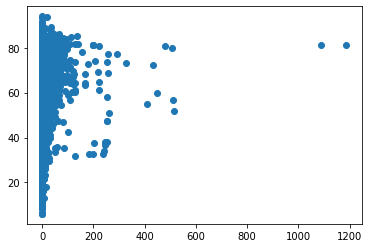

In [71]:
# Humidity could not be zero at anytime. So cleaning the data to take the values which are above zero.
df = df[df['Hum_pre_7'] > 0]
plt.scatter(df['Prec_pre_7'], df['Hum_pre_7'])
df.head(3)

In [72]:
# Lets build K-means clustering on above data for comparison
# I am selecting k=4, from elbo method implemented in assignment 1
# df.head(3)
X=df[['Prec_pre_7','Hum_pre_7']]


In [73]:
# Appling K-means clustering
km=KMeans(n_clusters=4 , init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_km = km.fit_predict(X)
y_km

array([1, 0, 0, ..., 0, 1, 0], dtype=int32)

In [74]:
df['Arry'] = y_km

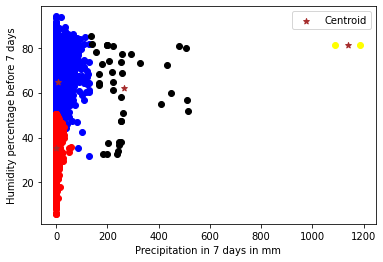

In [75]:

df1 = df[df.Arry==0]
df2 = df[df.Arry==1]
df3 = df[df.Arry==2]
df4 = df[df.Arry==3]
plt.scatter(df1.Prec_pre_7,df1.Hum_pre_7,color = 'blue')
plt.scatter(df2.Prec_pre_7,df2.Hum_pre_7, color = 'red')
plt.scatter(df3.Prec_pre_7,df3.Hum_pre_7, color = 'yellow')
plt.scatter(df4.Prec_pre_7,df4.Hum_pre_7, color = 'black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], color ='brown', marker='*', label ='Centroid')
# plt.scatter(df['fire_mag'],df['fire_size'] , color = 'white')
plt.xlabel("Precipitation in 7 days in mm")
plt.ylabel('Humidity percentage before 7 days')
plt.legend()

**Gaussian Matrix model implementation**

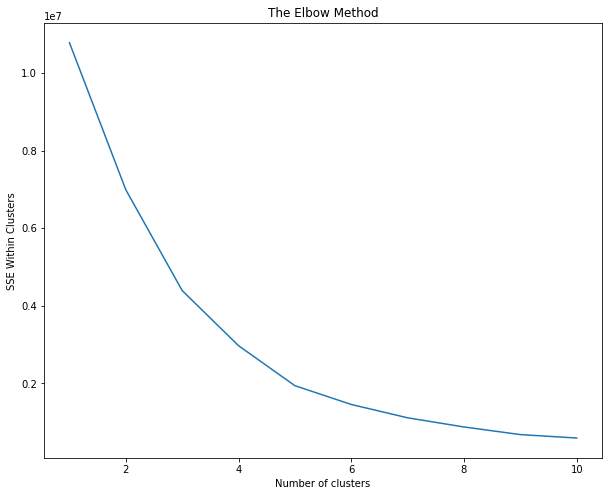

In [87]:
# Using Elbow method:
from sklearn.cluster import KMeans
plt.figure(figsize=(10,8))
# Within-Cluster-Sum-of-Squares 
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE Within Clusters')
plt.show()

In [84]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=5)
# Here I am using K=5, by above 
gmm.fit(X)
#predictions from gmm
labels = gmm.predict(X)

Index(['Prec_pre_7', 'Hum_pre_7', 'cluster'], dtype='object')


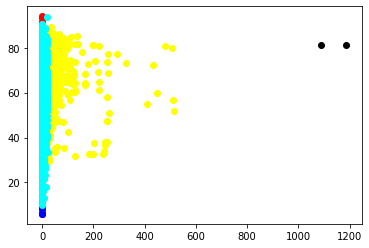

In [85]:
frame = pd.DataFrame(X)
frame['cluster'] = labels
frame.columns = ['Prec_pre_7', 'Hum_pre_7', 'cluster']
print(frame.columns)


color=['blue','red','yellow', 'black','cyan']
for k in range(0,5):
    df = frame[frame["cluster"]==k]
    plt.scatter(df['Prec_pre_7'], df['Hum_pre_7'],c=color[k])
plt.show()

In [86]:
# GMM Silhouette Score
from sklearn import metrics 
score = metrics.silhouette_score(X, labels, metric='euclidean', random_state=10)
print("silhouette score: " + str(score.round(2)))

silhouette score: 0.22


**other Algorithm Using DBSCAN**

In [88]:
np.unique(kmeans.labels_)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32)

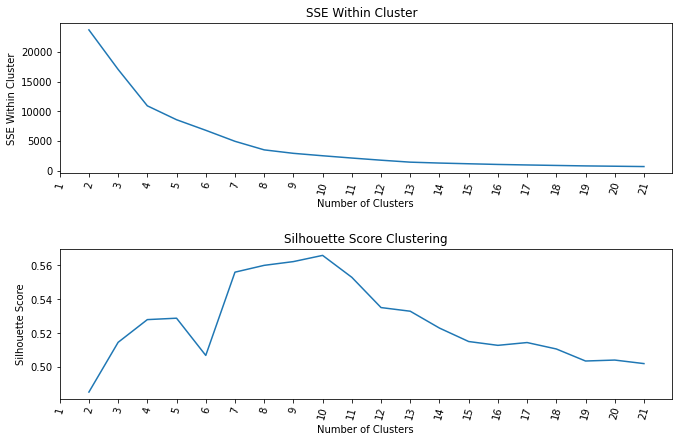

In [89]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import metrics
sc = StandardScaler()
X_rb = sc.fit_transform(X)
    
sse_within_cluster = {}
silhouette_score = {}
    
for i in range(2, 22): # Silhouette Coefficient is only defined if number of labels is 2 <= n_labels <= n_samples - 1
    kmeans = KMeans(n_clusters=i, random_state=42, init = 'k-means++', n_jobs=-1)
    kmeans.fit(X_rb)
    sse_within_cluster[i] = kmeans.inertia_
    silhouette_score[i] = metrics.silhouette_score(X_rb, kmeans.labels_, random_state=42)

plt.figure(figsize=(10,6))
ax1 = plt.subplot(211)
plt.plot(list(sse_within_cluster.keys()), list(sse_within_cluster.values()))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE Within Cluster")
plt.title("SSE Within Cluster  ")
plt.xticks([i for i in range(1, 22)], rotation=75)

ax2 = plt.subplot(212)
plt.plot(list(silhouette_score.keys()), list(silhouette_score.values()))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score Clustering")
plt.xticks([i for i in range(1, 22)], rotation=75)

plt.subplots_adjust(top=0.95, bottom=0.08, left=0.10, right=0.95, hspace=0.5, wspace=0.35)

In [90]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X_rb)
score = metrics.silhouette_score(X_rb, kmeans.labels_, random_state=10)
sse_within_cluster = kmeans.inertia_

print("clustering performance")
print("-----------------------------------")
print("silhouette score: " + str(score.round(2)))
print("sse withing cluster: " + str(sse_within_cluster.round()))

clustering performance
-----------------------------------
silhouette score: 0.53
sse withing cluster: 8616.0


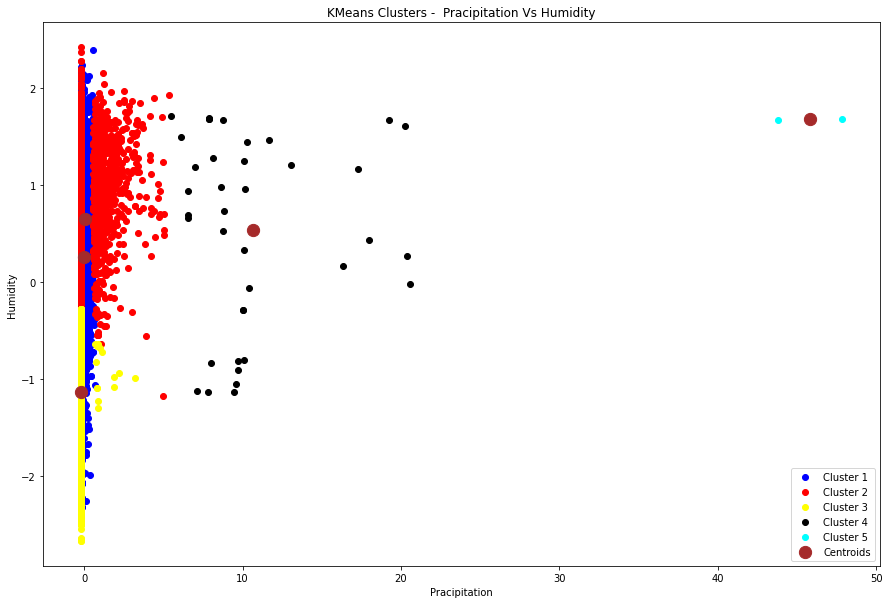

In [94]:
plt.figure(figsize=(15,10))
plt.scatter(X_rb[y_kmeans == 0, 0], X_rb[y_kmeans == 0, 1], c = 'blue', label = 'Cluster 1')
plt.scatter(X_rb[y_kmeans == 1, 0], X_rb[y_kmeans == 1, 1], c = 'red', label = 'Cluster 2')
plt.scatter(X_rb[y_kmeans == 2, 0], X_rb[y_kmeans == 2, 1], c = 'yellow', label = 'Cluster 3')
plt.scatter(X_rb[y_kmeans == 3, 0], X_rb[y_kmeans == 3, 1], c = 'black', label = 'Cluster 4')
plt.scatter(X_rb[y_kmeans == 4, 0], X_rb[y_kmeans == 4, 1], c = 'cyan', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 150, c = 'brown', label = 'Centroids')
plt.title('KMeans Clusters -  Pracipitation Vs Humidity')
plt.xlabel('Pracipitation')
plt.ylabel('Humidity')
plt.legend()
plt.show()

**DBSCAN Clustering - Density based clustering**
DBSCAN stands for Density- Based Spatial Clustering of Application with Noise (Noise includes outlires)

There are two important parameters for DBSCAN clustering

1.   eps: The distance that specifies the neighborhoods
2.   minPts : Minimum number of datapoints to define a cluster




In [95]:
import numpy as np
from sklearn.cluster import DBSCAN

In [96]:
Sc = StandardScaler()
X = Sc.fit_transform(X)
# We are calculating dbscan value
db = DBSCAN(eps=0.5, min_samples=5).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

print(labels[500:560])
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, labels))

[0 1 2 2 2 1 2 2 2 1 2 2 1 2 2 1 1 3 1 2 2 3 2 0 1 1 3 2 1 2 2 1 2 0 2 1 1
 1 1 1 0 1 2 1 0 1 3 0 2 0 0 2 1 1 1 1 1 1 1 2]
Estimated number of clusters: 5
Estimated number of noise points: 43
Silhouette Coefficient: 0.563


In [98]:
db = DBSCAN(eps=0.5, min_samples=20)
db.fit(X)

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=20, n_jobs=None, p=None)

Text(0.5, 1.0, 'Clusters determined by DBSCAN')

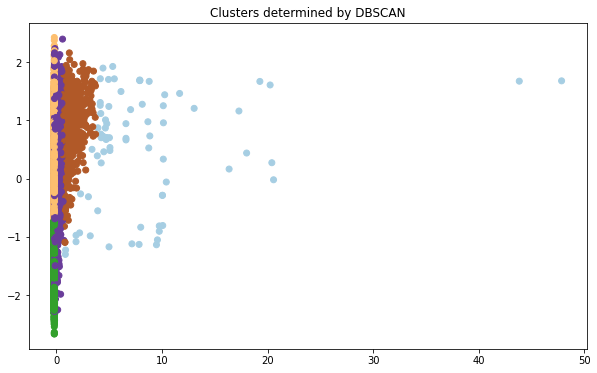

In [100]:
y_pred = db.fit_predict(X)
plt.figure(figsize=(10,6))

plt.scatter(X[:,0], X[:,1],c=y_pred, cmap='Paired')
plt.title("Clusters determined by DBSCAN")

Inference:
From above we can infere that, GMM has created more meaningfull clusters than K-means clustering.
And by using DBSCAN method, seperated the outlires.